# Test Notebook for hyothesis tool

### Structure
Explanations for the use of the code cells is displayed as text above them. 
### Executing Code 
To run a cell either press the play button at the top navigation bar or ctrl + Enter when the cell is selected (shown by an outline around the cell), once variables or parameters are changed the cell needs to be run again

### Import all necessary functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('./analysis'))


In [3]:
from analysis import *

Load an  excel sheet as data, based on absolute path, replace the file path "D:\\hypothesis\\..." with path to new sars excel sheet

In [4]:
df = load_data("./datasets/houseprices.csv")

## $\color{red}{\text{All cells above this need to be executed before starting to analyze}}$

## View variables

In [5]:
num_vars, cat_vars = find_variables(df, display=True)

Included numerical variables:

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Included categorical variables:

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQua

## Statisitical Tests

### Test Battery  
Define a list of variables of interest, perform appropriate tests for all combinations of variables in this list, generates a file called output.txt in the same directory as the notebook

In [6]:
variables = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
             'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',]

In [7]:
output = test_battery(df, variables, save=True)

MSSubClass vs LotFrontage
Test: Spearman Correlation 
Spearman Rho: -0.3142652112442123, p-Value: 6.137641165565008e-29 

MSSubClass vs LotArea
Test: Spearman Correlation 
Spearman Rho: -0.26957005535756146, p-Value: 1.0002034085196453e-25 

MSSubClass vs OverallQual
Test: Spearman Correlation 
Spearman Rho: 0.10806532905759873, p-Value: 3.507187672086561e-05 

MSSubClass vs OverallCond
Test: Spearman Correlation 
Spearman Rho: -0.07177022372854236, p-Value: 0.006078322372078473 

MSSubClass vs YearBuilt
Test: Spearman Correlation 
Spearman Rho: 0.03584837169040065, p-Value: 0.17098952835825715 

MSSubClass vs YearRemodAdd
Test: Spearman Correlation 
Spearman Rho: 0.006802424582276585, p-Value: 0.7950946830068281 

MSSubClass vs MasVnrArea
Test: Spearman Correlation 
Spearman Rho: 0.025035375928603776, p-Value: 0.3404361799757434 

MSSubClass vs BsmtFinSF1
Test: Spearman Correlation 
Spearman Rho: -0.10762907030626014, p-Value: 3.773064400812438e-05 

MSSubClass vs BsmtFinSF2
Test: Spe

### Individual Tests
Perform individual tests for selected variables

In [8]:
kw_result = kruskal_wallis(df, cat_col='Street', num_col='LotFrontage')

H-Value: 1.5552020266074562, p-Value: 0.21236912096522537


In [9]:
chi2_result = chi_2(df, 'Street', 'Electrical' )

Chi2: 1.1486998040860372, p-Value: 0.8864704604378693, DoF: 4


In [10]:
numerical_correlation(df, "LotFrontage" , "LotArea")

'Test: Spearman Correlation \nSpearman Rho: 0.6496329683785944, p-Value: 6.52618680604516e-145 \n'

## Figures

In [14]:
grouped_box_plot(df, cat_col="Street", num_cols=['MSSubClass', 'LotFrontage', 'LotArea'])

In [16]:
scatter_correlation_plot(df, var1='LotFrontage', var2='MSSubClass')

0.0000


C:\Users\micha\.conda\envs\mt\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



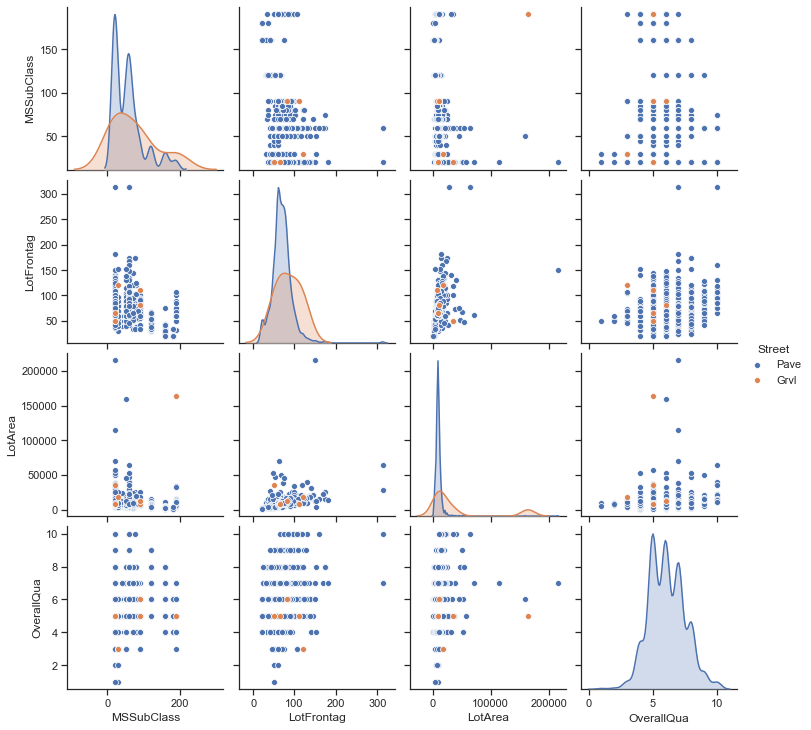

In [17]:
grouped_plot_matrix(df, num_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'], cat_var="Street")

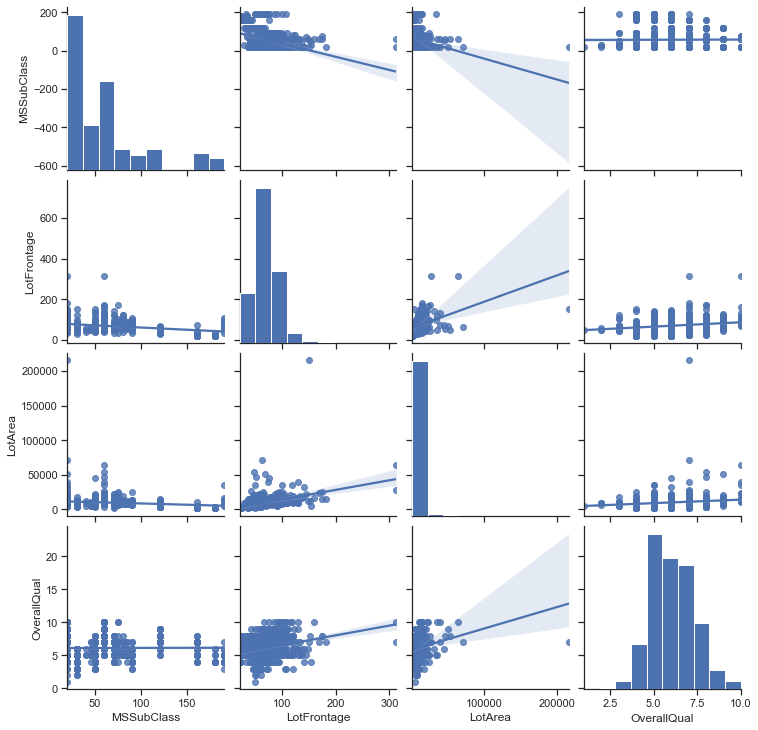

In [18]:
regression_scatter_matrix(df, variables=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'])

In [25]:
parallel_coordinates_plot(df, variables=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'], group_var="SalePrice")

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'SalePrice']
MSSubClass
LotFrontage
LotArea
OverallQual


## Train Models

### Define data included in training the models

Show the variables included in computation

In [26]:
num_vars, cat_vars = find_variables(df, display=True)

Included numerical variables:

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Included categorical variables:

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQua

In [27]:
excluded_variables = []

## Cluster

In [28]:
vbgmm_cluster(df, n_clusters=3)

[]


array([2, 1, 2, ..., 0, 1, 1], dtype=int64)

In [23]:
hdbscan_clustering(df, min_cluster_size=2, min_samples=1, dims=2)

[]
[0 0 0 ... 0 0 0]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Regression
To train a model to predict a numerical variable in the data use one of the models setting the target to the desired variable

[]
Creating a random forest regression model
Score: 0.8883820769062181


C:\Users\micha\.conda\envs\mt\lib\site-packages\shap\explainers\tree.py:114: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



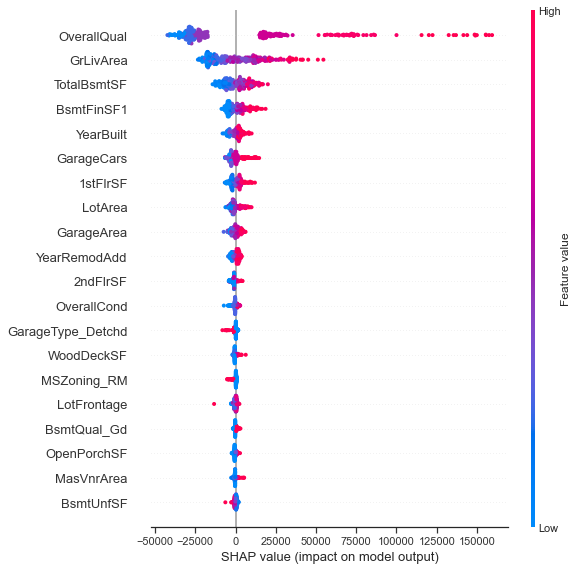

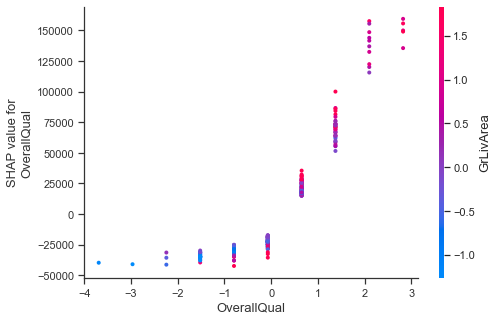

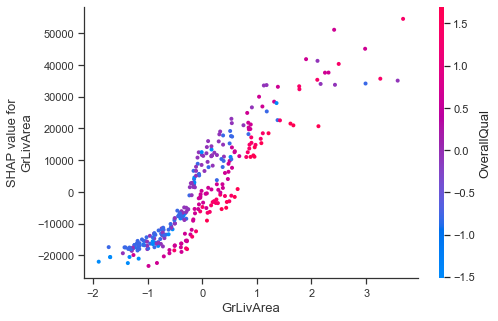

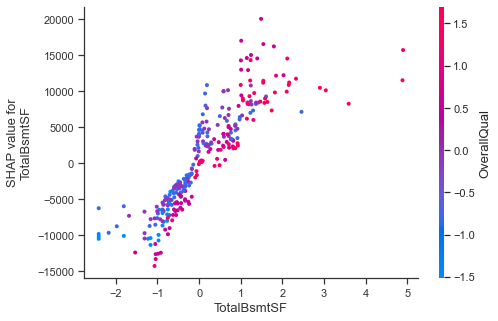

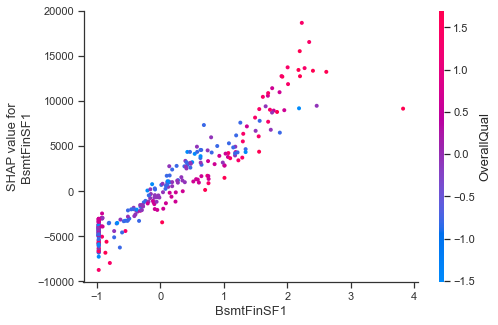

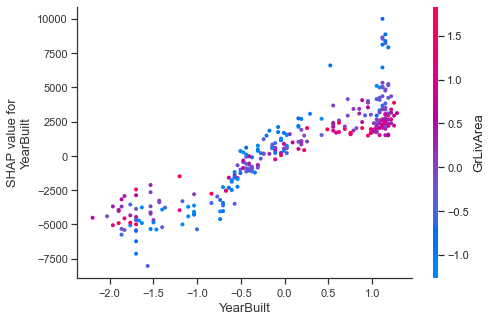

C:\Users\micha\projects\mt\analysis\display\feature_importance.py:58: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



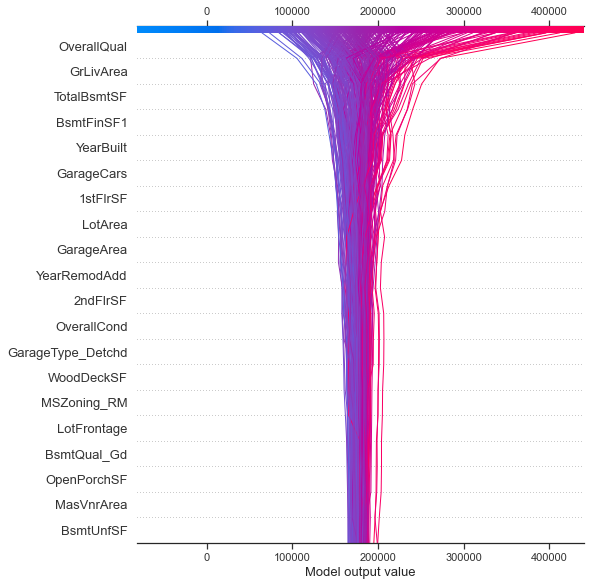

In [29]:
rf_m = random_forest(df, "SalePrice", excluded_variables=excluded_variables, cv=False)